In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score
from pyod.models.knn import KNN 
from sklearn.model_selection import KFold
import hdbscan
import seaborn as sns

def str_to_numeric(Data):

 label_mapping = {}
 char_cols = Data.dtypes.pipe(lambda x: x[x == 'object']).index
 for c in char_cols:
    Data[c], label_mapping[c] = pd.factorize(Data[c])

 return Data




In [3]:
def str_to_numeric(data):
    data1 = data.copy()
    label_mapping = {}
    char_cols = data1.dtypes.pipe(lambda x: x[x == 'object']).index
    for c in char_cols:
       data1[c], label_mapping[c] = pd.factorize(data1[c])
    return data1

In [4]:
def MLModel(trainX,trainY,testX,clf):
    clf.fit(trainX,trainY)
    return clf.predict(testX)
    

def KFoldValidation(train_X,train_Y,clf,k):
    kf = StratifiedKFold(n_splits=6)
    for train_index, test_index in kf.split(train_X,train_Y):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_Y.iloc[train_index], train_Y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test) 
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp) 
        print("specificity = ",specificity) 
        print("precision = ",precision_score(y_test, y_pred))
        print("f1 score = ",f1_score(y_test, y_pred)) 
        print("recall = ",recall_score(y_test, y_pred)) 
        print(confusion_matrix(y_test, y_pred))
    
def evaluateTestData(y_test, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp) 
        print("specificity = ",specificity) 
        print("precision = ",precision_score(y_test, y_pred))
        print("f1 score = ",f1_score(y_test, y_pred)) 
        print("recall = ",recall_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

In [21]:
def encode_job(job):
    job_copied = job.copy()
    job_copied[job_copied=='housemaid']=0
    job_copied[job_copied=='services']=1
    job_copied[job_copied=='admin.']=2
    job_copied[job_copied=='admin']=2
    job_copied[job_copied=='blue-collar']=3
    job_copied[job_copied=='technician']=4
    job_copied[job_copied=='retired']=5
    job_copied[job_copied=='management']=6
    job_copied[job_copied=='unemployed']=7
    job_copied[job_copied=='self-employed']=8
    job_copied[job_copied=='entrepreneur']=9
    job_copied[job_copied=='student']=10
    job_copied[job_copied=='unknown']=11
    return job_copied

def encode_marital(marital):
    marital_copied = marital.copy()
    marital_copied[marital_copied=='married']=0
    marital_copied[marital_copied=='single']=1
    marital_copied[marital_copied=='divorced']=2
    marital_copied[marital_copied=='unknown']=3
    return marital_copied

def encode_education(education):
    education_copied = education.copy()
    education_copied[education_copied=='basic.4y']=0
    education_copied[education_copied=='high.school']=1
    education_copied[education_copied=='basic.6y']=2
    education_copied[education_copied=='basic.9y']=3
    education_copied[education_copied=='professional.course']=4
    education_copied[education_copied=='university.degree']=5
    education_copied[education_copied=='illiterate']=6
    education_copied[education_copied=='unknown']=7
    return education_copied

def encode_month(month):
    month_copied = month.copy()
    month_copied[month_copied=='jan']=0
    month_copied[month_copied=='feb']=1
    month_copied[month_copied=='mar']=2
    month_copied[month_copied=='apr']=3
    month_copied[month_copied=='may']=4
    month_copied[month_copied=='jun']=5
    month_copied[month_copied=='jul']=6
    month_copied[month_copied=='aug']=7
    month_copied[month_copied=='sep']=8
    month_copied[month_copied=='oct']=9
    month_copied[month_copied=='nov']=10
    month_copied[month_copied=='dec']=11
    return month_copied

def encode_day_of_week(day_of_week):
    day_of_week_copied = day_of_week.copy()
    day_of_week_copied[day_of_week_copied=='mon']=0
    day_of_week_copied[day_of_week_copied=='tue']=1
    day_of_week_copied[day_of_week_copied=='wed']=2
    day_of_week_copied[day_of_week_copied=='thu']=3
    day_of_week_copied[day_of_week_copied=='fri']=4
    return day_of_week_copied

def encode_poutcome(poutcome):
    poutcome_copied = poutcome.copy()
    poutcome_copied[poutcome_copied=='nonexistent']=0
    poutcome_copied[poutcome_copied=='failure']=1
    poutcome_copied[poutcome_copied=='success']=2
    return poutcome_copied

def encode_contact(contact):
    contact_copied = contact.copy()
    contact_copied[contact_copied=='cellular']=0
    contact_copied[contact_copied=='telephone']=1
    return contact_copied

def encode_binary(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=0
    binary_copied[binary_copied=='yes']=1
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

def encode_binary_rev(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=1
    binary_copied[binary_copied=='yes']=0
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

def normalize(data):
    data1 = data.copy()
    scaler = MinMaxScaler()
    scaler.fit(data1)
    return scaler.transform(data1)

In [6]:
def encode_full_train(df):
    df1 = df.copy()
    df1['job'] = encode_job(df['job']).astype('int64')
    df1['marital'] = encode_marital(df['marital']).astype('int64')
    df1['education'] = encode_education(df['education']).astype('int64')
    df1['loan'] = encode_binary(df['loan']).astype('int64')
    df1['housing'] = encode_binary(df['housing']).astype('int64')
    df1['default'] = encode_binary(df['default']).astype('int64')
    df1['poutcome'] = encode_poutcome(df['poutcome']).astype('int64')
    df1['contact'] = encode_contact(df['contact']).astype('int64')
    df1['month'] = encode_month(df['month']).astype('int64')
    df1['day_of_week'] = encode_day_of_week(df['day_of_week']).astype('int64')
    df1['y'] = encode_binary(df['y']).astype('int64')
    return df1

def encode_full_test(df):
    df1 = df.copy()
    df1['job'] = encode_job(df['job']).astype('int64').astype('int64')
    df1['marital'] = encode_marital(df['marital']).astype('int64')
    df1['education'] = encode_education(df['education']).astype('int64')
    df1['loan'] = encode_binary(df['loan']).astype('int64')
    df1['housing'] = encode_binary(df['housing']).astype('int64')
    df1['default'] = encode_binary(df['default']).astype('int64')
    df1['poutcome'] = encode_poutcome(df['poutcome']).astype('int64')
    df1['contact'] = encode_contact(df['contact']).astype('int64')
    df1['month'] = encode_month(df['month']).astype('int64')
    df1['day_of_week'] = encode_day_of_week(df['day_of_week']).astype('int64')
    return df1

def add_prefix(df):
    df1 = df.copy()
    df1['job'] = 'job_'+ df1['job']
    df1['marital'] = 'marital_'+ df1['marital']
    df1['education'] = 'education_'+ df1['education']
    df1['loan'] = 'loan_'+ df1['loan']
    df1['housing'] = 'housing_'+ df1['housing']
#     df1['default'] = 'default_'+ df1['default']
    df1['poutcome'] = 'poutcome_'+ df1['poutcome']
    df1['contact'] = 'contact_'+ df1['contact']
    df1['month'] = 'month_'+ df1['month']
    df1['day_of_week'] = 'day_of_week_'+ df1['day_of_week']
    return df1

def change_data_type_to_int64(df):
    df1 = df.copy()
    cols = ['job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course',
       'education_university.degree', 'loan_yes',
       'housing_yes', 'poutcome_failure',
       'poutcome_success', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed']
    for c in cols:
        df1[c] = df1[c].astype('int64')
    return df1

In [7]:
def change_dummy_variables(df):
    df1 = df.copy()
    df1 = pd.concat([df1,pd.get_dummies(df['job'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['marital'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['education'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['loan'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['housing'])],axis=1)
#     df1 = pd.concat([df1,pd.get_dummies(df['default'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['poutcome'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['contact'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['month'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['day_of_week'])],axis=1)
#     df1 = pd.concat(df1,pd.get_dummies(df['y']),axis=1)
    df1 = df1.drop(['job','marital','education','loan','housing','default','poutcome','contact','month','day_of_week'],axis=1)
    return df1

def kthdummy(df):
    df1 = df.copy()
    df1 = df1.drop(['job_student','marital_divorced','education_illiterate','loan_no','housing_no','poutcome_nonexistent','month_dec','day_of_week_fri'],axis=1)
    return df1

In [8]:
# pd.get_dummies(unprunedAndImputedData['job'])[0:20]

In [9]:
# label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
#       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
#       'entrepreneur', 'student'],
#      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
#       'professional.course', 'unknown', 'university.degree', 'illiterate'],
#      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}

In [32]:
unprunedAndImputedData = pd.read_csv('/home/vignesh/Downloads/Unprunued_and_Imputed_Training data.csv')
testData = pd.read_csv('/home/vignesh/Downloads/Final_dataset_test.csv')

In [33]:
testData[0:10]

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,id
0,22519,50,housemaid,married,basic.4y,no,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,no,22782
1,7574,37,self-employed,married,high.school,no,no,no,telephone,may,...,8,999,0,nonexistent,1.1,93.994,-36.4,4.864,no,7690
2,26940,60,admin,married,university.degree,no,yes,no,cellular,mar,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.531,no,27936
3,1574,47,blue-collar,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,no,1610
4,26026,35,technician,married,university.degree,no,no,no,cellular,nov,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.076,no,26849
5,27126,44,technician,divorced,professional.course,no,no,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,no,28186
6,30069,42,technician,married,professional.course,no,no,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,no,32210
7,19635,36,technician,married,university.degree,no,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,no,19879
8,33100,24,blue-collar,single,basic.9y,no,no,no,cellular,jun,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,no,36475
9,3341,34,management,married,university.degree,no,no,yes,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,no,3409


In [53]:
# unprunedAndImputedDataNumeric = encode_full_train(unprunedAndImputedData)
# unprunedAndImputedDataNumeric1 = add_prefix(unprunedAndImputedData)
# unprunedAndImputedDataNumeric2 = change_dummy_variables(unprunedAndImputedDataNumeric1)
# unprunedAndImputedDataNumeric3 = kthdummy(unprunedAndImputedDataNumeric2)
# unprunedAndImputedDataNumeric4 = change_data_type_to_int64(unprunedAndImputedDataNumeric3)

# testData1 = add_prefix(testData)
# testData2 = change_dummy_variables(testData1)
# testData3 = kthdummy(testData2)
# testData4 = change_data_type_to_int64(testData3)
unPruned_train_X = encode_full_train(unprunedAndImputedData.drop(['id'],axis=1)).drop('y',axis=1)
unPruned_train_Y = encode_binary(unprunedAndImputedData[['y']]).astype('int64')
testData5 = encode_full_test(testData.drop(testData.columns[0],axis=1).drop(['id','y'],axis=1))
# prunedDataNumeric = encode_full_train(prunedData)
# prunedDataNumeric1 = change_dummy_variables(prunedDataNumeric)

# testDataNumeric = encode_full_train(testData)

In [54]:
unPruned_train_X[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,0,0,0,0,0,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
1,57,1,0,1,0,0,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
2,37,1,0,1,0,1,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
3,40,2,0,2,0,0,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
4,56,1,0,1,0,0,1,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
5,45,1,0,3,0,0,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
6,59,2,0,4,0,0,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
7,41,3,0,2,0,0,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
8,24,4,1,4,0,1,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857
9,25,1,1,1,0,1,0,1,4,0,1,999,0,0,1.1,93.994,-36.4,4.857


In [55]:
# unPruned_train_X = unprunedAndImputedData.drop(['id','y'],axis=1)
# unPruned_train_Y = encode_binary(unprunedAndImputedData[['y']]).astype('int64')

In [17]:
# unPruned_train_X = unPruned_train_X.drop(['loan_yes'],axis=1)
# testData5 = testData5.drop(['loan_yes'],axis=1)

In [74]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight={1: 0.9, 0: 0.1})

In [75]:
KFoldValidation(unPruned_train_X,unPruned_train_Y,clf,10)

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


specificity =  1.0
precision =  0.0
f1 score =  0.0
recall =  0.0
[[5002    0]
 [ 640    0]]


/home/vignesh/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


specificity =  1.0
precision =  1.0
f1 score =  0.04580152671755725
recall =  0.0234375
[[5002    0]
 [ 625   15]]


/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


specificity =  1.0
precision =  1.0
f1 score =  0.15561959654178675
recall =  0.084375
[[5002    0]
 [ 586   54]]


/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


specificity =  0.0
precision =  0.11107161897991825
f1 score =  0.19945747566618796
recall =  0.9765625
[[   0 5002]
 [  15  625]]


/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


specificity =  0.010397920415916816
precision =  0.1145106459116121
f1 score =  0.20549044790496068
recall =  1.0
[[  52 4949]
 [   0  640]]


/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


specificity =  0.0
precision =  0.11329787234042553
f1 score =  0.20353559483994269
recall =  1.0
[[   0 5001]
 [   0  639]]


In [76]:
unPruned_train_X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m'],
      dtype='object')

In [77]:
testData5.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m'],
      dtype='object')

In [78]:
predictedData1 = MLModel(unPruned_train_X,unPruned_train_Y,testData5,clf)

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [79]:
evaluateTestData(encode_binary(testData['y']).astype('int64'),predictedData1)

specificity =  0.7822208551215011
precision =  0.2934131736526946
f1 score =  0.4139387539598733
recall =  0.7025089605734767
[[5086 1416]
 [ 249  588]]


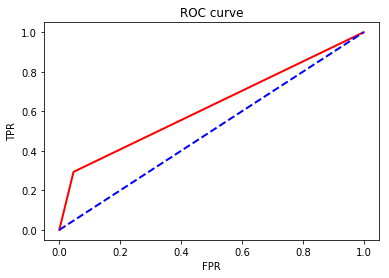

0.6234151720054784

In [89]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

##Computing false and true positive rates
fpr, tpr,_=roc_curve(predictedData1,encode_binary(testData4['y']).astype('int64'),drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
auc(fpr, tpr)

In [73]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
n_estimators = [100,200,300,400,500]
class_weights = [{1:0.5,0:0.5},{1: 0.6, 0: 0.4},{1: 0.7, 0: 0.3},{1: 0.8, 0: 0.2},{1: 0.9, 0: 0.1}]

# maxiterations = [100,200,300,400,500,600,700]
# max_depth = [5,6,7,8]
# logisticDict = dict(C=CValue,max_iter=maxiterations,class_weight=class_weights)
randomDict = dict(n_estimators=n_estimators,class_weight=class_weights)

# logisticDict = dict(maxiter=maxiterations)
# grid = GridSearchCV(clf, logisticDict, cv=6, scoring='precision')

def TuneHyperParameters(dictionary,clf,cv,scoring,trainX,trainY,plt):
    grid = GridSearchCV(clf, dictionary, cv=cv, scoring=scoring)
    grid.fit(trainX,trainY)
    testrange = range(1,len(grid.error_score)+1)
#     grid_validation = [x.mean_validation_score for x in grid.grid_scores_]
#     plt.plot(testrange,grid_validation)
#     for x in grid.error_score:
#         print(x)
    print(grid.cv_results_)
    print(grid.best_estimator_)
    return grid

grid_ = TuneHyperParameters(randomDict,clf,6,'recall',unPruned_train_X,unPruned_train_Y,plt)

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

{'mean_fit_time': array([0.43845153, 0.81348089, 1.2033118 , 1.59655388, 2.00718355,
       0.403585  , 0.80325258, 1.19821505, 1.59946263, 1.99315441,
       0.40509005, 0.80937783, 1.20580959, 1.59705317, 1.99527903,
       0.40427848, 0.80719324, 1.20260501, 1.59850347, 2.00036856,
       0.40426362, 0.80945758, 1.20320519, 1.60258985, 2.00230296]), 'std_fit_time': array([0.01855115, 0.00859321, 0.01885932, 0.02426628, 0.04217527,
       0.00718361, 0.01283701, 0.01818387, 0.02640126, 0.03249675,
       0.00767936, 0.0163685 , 0.02551942, 0.02461025, 0.02747836,
       0.00608383, 0.01510094, 0.02026565, 0.02341881, 0.04014823,
       0.00654081, 0.00791273, 0.01955143, 0.02598244, 0.03155623]), 'mean_score_time': array([0.02089036, 0.03944822, 0.05781198, 0.07601043, 0.09455494,
       0.02065786, 0.039126  , 0.05766356, 0.07613985, 0.09456174,
       0.02061228, 0.03916486, 0.05772082, 0.07607067, 0.09474508,
       0.02061347, 0.03924274, 0.05770369, 0.07613854, 0.09466863,
     